<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to numpy:**
Please see the slides available at https://github.com/mgirfogl/numerical-analysis-2023-2024/blob/main/material/08-PS-Exercises-python-interpolation/Numpy_Scipy_Python.pdf for more info. Both this section and the one regarding Matplotlib do not contain the same amount of information which can be found in the PDF file linked above.

In [1]:
import numpy as np # To use just np. instead of numpy
# ndim: number of axes
# shape: tuple of integers indicarting he size in each dimension
# size =total #  of elements
a = np.array([6,7,8])
b= np.array([[1., 0., 0.],[1.1, 3.1, 0.0]])
print(b)

# Common error a = np.array(...) ---> use square brackets
# "zeros", "ones" to create an array of only zero/one elements
z = np.zeros((3,4))
print(z)
o = np.ones((2,3,4)) # You can specify the type of element in the array
print(o)
lunghezza = 20
k1 = np.arange(3, lunghezza, 4) # You can build an array from 3 to lunghezza-1 with step 4
print(k1)
k2 = np. arange(0,2,0.3)
# 0 default start, 1 default step, if not specified

a = np.random.random((2,3))
print(a.sum()) # a.sum() returns the sum of all the elements of the array
a.min()
a.max()

# b = np.arange(12).reshape((3,4)) # Now it has 3 rows and 4 columns
# Pay attention to the number we put. (3,2) gives an error: 3*2=6, while we have 12 elements, so we cannot reshape
b.min(axis=1) # min along the 2nd axis

# To access elements: [] operator
a[0,2] #or a[0][2], it is the same
# Array slicing: see the notes for a more detailed explanation
# a[:6:2] = -3 # It puts -3 in each of these positions
# a[2:5] # Elements from index 2 to 5-1
# a[::-1] #  To reverse "a

# Use comma, index for each axis
# b[2,3]
# b[0:3,1] # Each row in the second column


# You can also manipulate your arrays!

# a.reshape gives automatically the right dimension
# a.resize changes the original one!
# a<35 # Is each element < 35?

[[1.  0.  0. ]
 [1.1 3.1 0. ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
[ 3  7 11 15 19]
2.7329760784601813


0.8198714256310615

# **Matplotlib:**
It is a popular library used to visualize data.

It gives you control over all parts of the figure: title, lines, markers, legend, grid, label of the figure...

It also allows to save a figure, e.g. as a PDF file.

PDF files are of good quality: they are great, for instance, for papers.


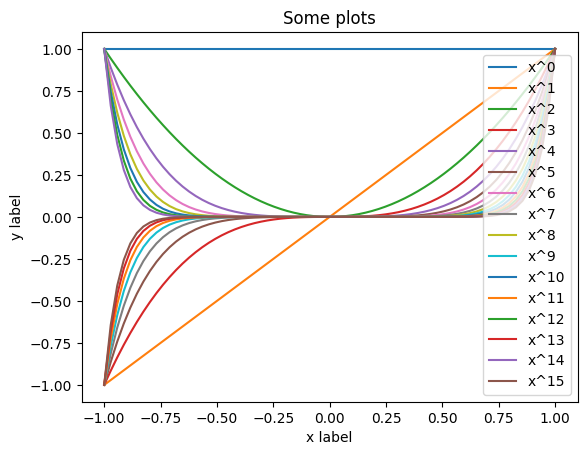

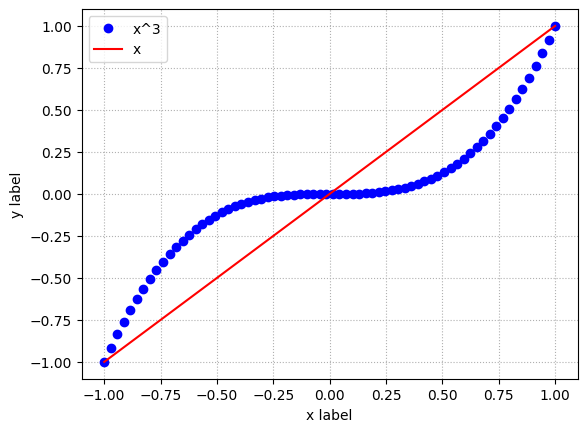

In [2]:
import matplotlib.pyplot as plt

# plt.plot(x,y)
# plt.show() ----> only to visualize a figure.

x=np.linspace(-1,1,70) # It divides the interval (-1,1) in n+1 subintervals (all the points of the grid are equispaced)
for i in range(0,16):
  plt.plot(x,x**i,label='x^'+str(i)) # Plotting the function x^i for some values of i
plt.xlabel('x label') # To add the x-label
plt.ylabel('y label') # To add the y-label
plt.legend() # To add the legend
plt.title('Some plots') # To add the title
plt.show() # To show the plot

plt.plot(x, x**3, 'bo', label='x^3') # 'bo' ----> to see just the points
plt.plot(x, x, 'r-', label='x') # Red
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.grid(linestyle='dotted') # To see the grid
plt.savefig('myplot.pdf') # To save the figure
plt.show()

To see a gallery of plots, visit https://matplotlib.org/gallery/index.html. When you like some plot, you can read the code for producing it and adjust it to your problem with (hopefully) just some minor tweaks.

# **Polynomial interpolation:**
To have more theoretical info, see https://github.com/mgirfogl/numerical-analysis-2023-2024/blob/main/material/08-PS-Exercises-python-interpolation/Interpolation.pdf.

We start by using the monomial basis.

Populating the interactive namespace from numpy and matplotlib


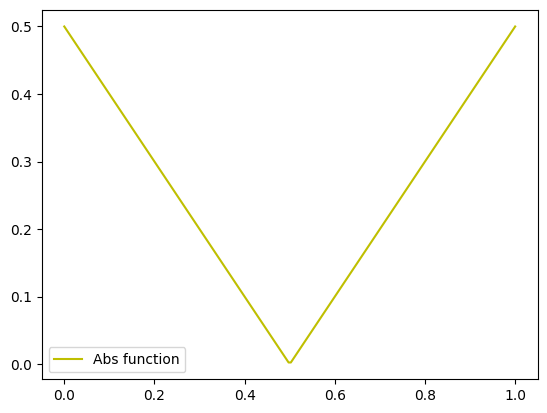

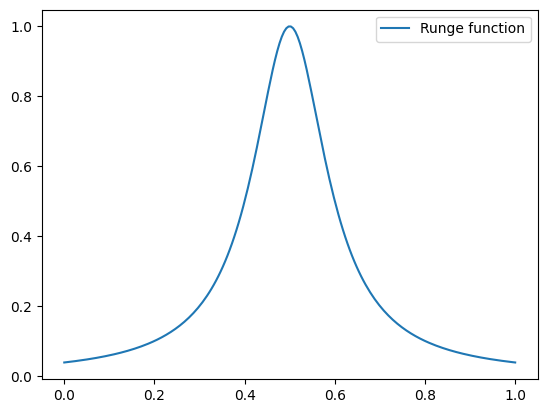

In [3]:
%pylab inline
# So we can use array instead of np.array
# Populating the interactive namespace from numpy and matplotlib

def my_fun1(x):
  return abs(x-0.5) # We consider the interval [0,1]; absolute value function translateed by 1/2.

def my_fun2(x):
  return 1/(1+100*(x-0.5)**2) # Runge funtion

x=linspace(0,1,200)

plot(x,my_fun1(x), 'y-', label = 'Abs function')
plt.legend()
plt.show()

plot(x, my_fun2(x), label = 'Runge function')
plt.legend()
plt.show()

Building the interpolation points:

Text(0.5, 1.0, 'Interpolation points')

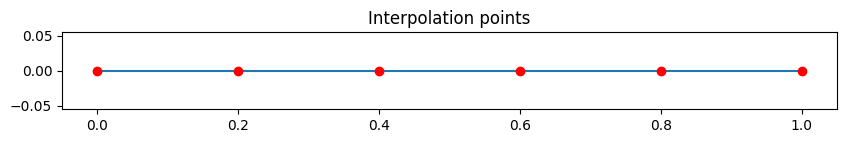

In [4]:
n = 5 # Degree of the polynomial
X = linspace(0, 1, n+1)
figsize(10,1) # To resize the figure
plot(x, 0*x) # To plot the x axis
plot(X, 0*X, 'ro')
title('Interpolation points')

Building the basis:

In [5]:
def basis(x,i,n): #v_i(x); actually it does not use n explicitly
# We could add the following lines:
# if i>n:
#   print("Error: cannot  be greater than "+str(n))
#   return None
  """
  Monomial basis
  n is the order of the polynomial
  i is a number between 0 and n
  """
  return x**i

Now we visualize the basis:

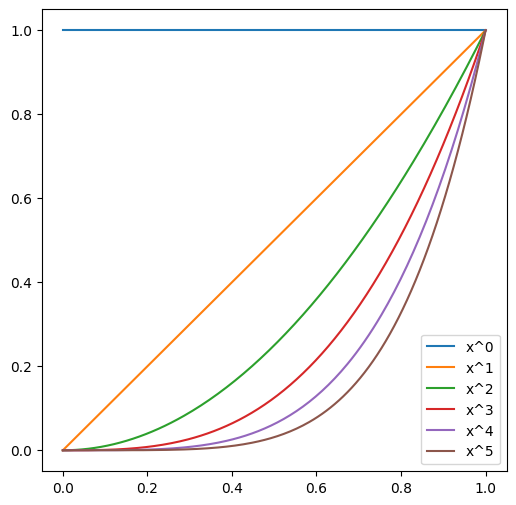

In [6]:
figsize(6,6)
for i in range(n+1):
  plot(x,basis(x,i,n), label='x^'+str(i)) # Plotting the basis
legend()

Now we build the Vandermonde matrix:

In [7]:
# V=zeros((n+1, n+1)) # Initialize with all zeroes
# for i in range(n+1):
#  for j in range(n+1):
 #   V[i,j]=basis(X[i], j, n)

# Actually we could write:
V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)]) # A more
# efficient way to build it.

Now we evaluate the function at the interpolation points:

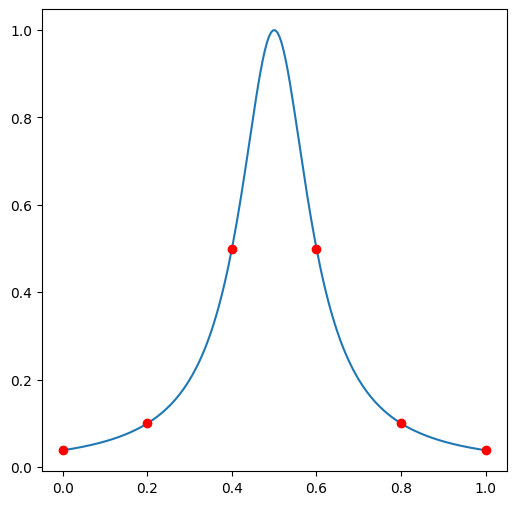

In [8]:
u = my_fun2(X) # Evaluating our function at the interpolation points
p = solve(V,u) # To solve the linear system Vp=u in order to find the vector of coefficients p.
plot(x,my_fun2(x))
plot(X, V.dot(p), 'ro') # V.dot(p) is used to evaluate the product. Actually, we could have just written:
# plot(X, my_fun2(X),'ro') # which does the same exact thing, taking directly the values of the function on X.

 Now we build the matrix $B$, whose elements are the basis functions evaluated at the interpolation points.

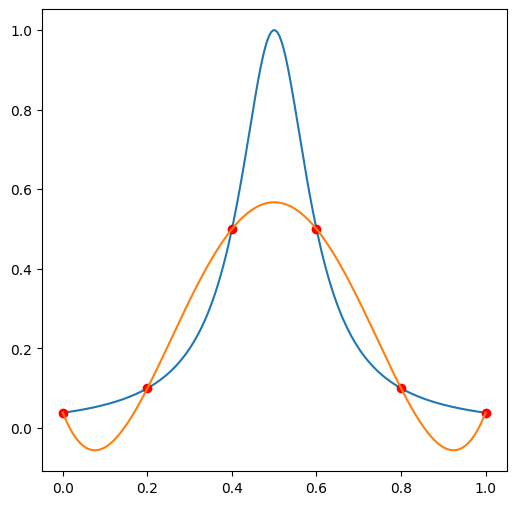

In [9]:
B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))])
# Evaluating the basis functions on the grid
B.shape # To reshape it automatically

plot(x,my_fun2(x)) # Plotting the function
plot(X,V.dot(p),'ro') # Plotting the points
plot(x,B.dot(p)) # Plotting the polynomial

Now we define the error and condition number of the Vandermonde matrix $V$.
We can see that, even for a small dimension $n$, it is ill-conditioned.

In [10]:
error = np.max(abs(B.dot(p)-my_fun2(x))) # Definition of the error
print(error)

cond(V) # Condition number of the matrix V

0.4321051132111742


4924.3710566111995

Now we compute the Lagrange basis starting from the monomial basis and we plot it:

(200, 6)


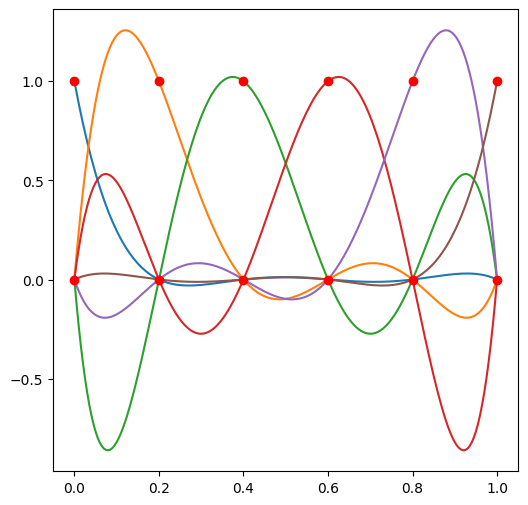

In [11]:
Vinv = inv(V) # Computing the inverse of V
Bl = B.dot(Vinv) # Computing the product of B and the inverse of V
print(Bl.shape)
plot(x,Bl[:,:]) # plot(x,Bl[:,0]) # To plot only the first  element of
# Lagrange's basis
plot(X,0*X,'ro') # Plotting the points (0, 0), (0, 0.2), ...
plot(X,0*X+1,'ro') # Plotting the points (1, 0), (1, 0.2), ...

Now we shall define a function  which takes as input a continuous function, an interval and a set of nodes and returns the interpolant of the function relevant to the points of the grid, the Vandermonde matrix, the vector of coordinates $p$ and (even if it can be obtained from the other data in the output) the product between $B$ and $p$.

To check whether it works or not, we plot the result of the function and compare it with the plot we had before.

Condition number of V:  4924.3710566111995


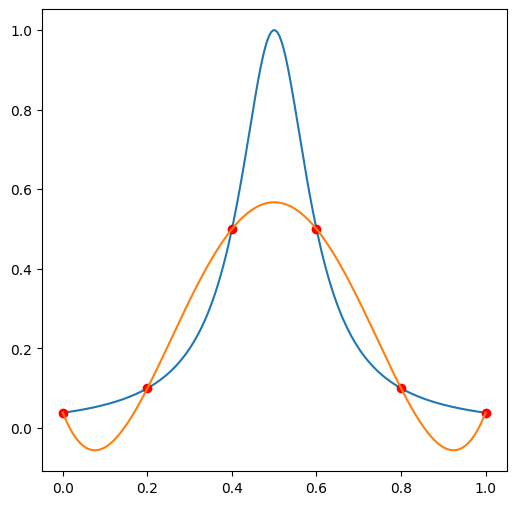

In [12]:
def interpolation(fun, X, x): # Taking as input the interval, the points on
# which we interpolate and the function.
  n = len(X) - 1 # The degree is one less than the number of points.
  V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)])
  # Create the matrix.
  print("Condition number of V: ", cond(V)) # We print the condition number of
  # the matrix.
  B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))]) # B
  # as before, we evaluate the basis in the grid points.
  p = solve(V, fun(X))
  return B.dot(p), p, B, V

# Checking the results by plotting our functions:
plot(x, my_fun2(x))
plot(X, my_fun2(X),'ro')
plot(x, interpolation(my_fun2,X,x)[0])

What happens when we increase the degree of the polynomial?

If we try with, say, $n = 8$, we see a bad situation: the interpolant oscillates a lot and the error tends to increase.

For $n = 12$, the situation becomes tragic.

This is the situation with $n = 5$, $n = 10$ and $n = 15$.

Condition number of V:  4924.3710566111995
Condition number of V:  2009396.3800388556
Condition number of V:  6780588494.9134035


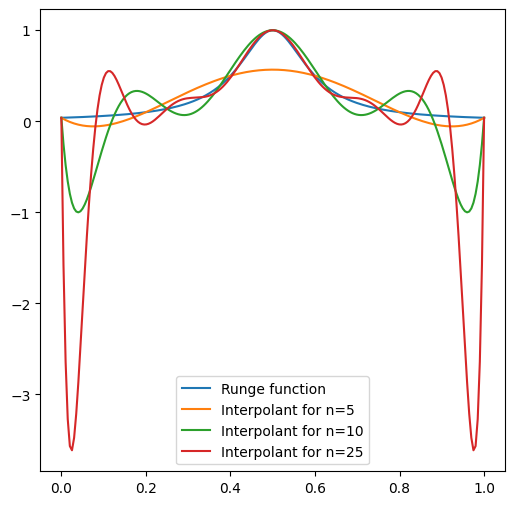

In [13]:
plot(x, my_fun2(x), label='Runge function')
plot(x, interpolation(my_fun2,X,x)[0], label='Interpolant for n=5')
n=8
X = linspace(0,1,n+1)
plot(x, interpolation(my_fun2,X,x)[0], label='Interpolant for n=10')
n=12
X = linspace(0,1,n+1)
plot(x, interpolation(my_fun2,X,x)[0], label='Interpolant for n=25')
legend()

It is worth stressing that, under some assumptions, polynomial interpolation works as expected.

*Just for curiosity*: for instance, if $f$ satisfies the Hölder condition and we use Čebyšëv nodes, then the error converges to zero. This holds, for instance, if $f$ is of class $C^1([a,b])$.

While is true that for any nodal scheme there exists a continuous function for which the error diverges, it is also important to remark that the choice of the interpolation points could be crucial in some situations. Also, there are functions that are not as "problematic" as the two functions we have seen in today's lab.

For instance, using Čebyšëv nodes to interpolate the Runge function, we have convergence.

Here is an example in which interpolation is effective (even working with equispaced points!):

Condition number of V:  2.6180339887498953
Condition number of V:  15.099657722502098
Condition number of V:  98.86773850722771
Condition number of V:  1.1297571360602325e+22


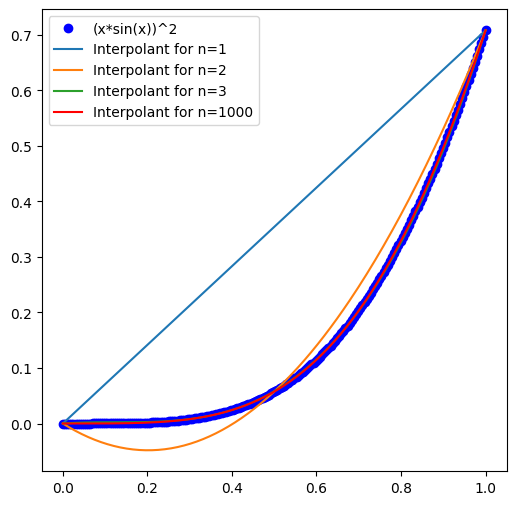

In [14]:
import math
def my_fun3(q):
  return (q*sin(q))**2
n=1
X = linspace(0,1,n+1)
plot(x, my_fun3(x), 'bo',label='(x*sin(x))^2')
plot(x, interpolation(my_fun3,X,x)[0], label='Interpolant for n=1')
n=2
X = linspace(0,1,n+1)
plot(x, interpolation(my_fun3,X,x)[0], label='Interpolant for n=2')
n=3
X = linspace(0,1,n+1)
plot(x, interpolation(my_fun3,X,x)[0], label='Interpolant for n=3')
n=1000
X = linspace(0,1,n+1)
plot(x, interpolation(my_fun3,X,x)[0], 'r-',label='Interpolant for n=1000')
legend()

Now we plot the error and the condition number of $V$ in the case of the Runge function and the absolute value function:

Condition number of V:  98.86773850722771
Condition number of V:  98.86773850722771
Condition number of V:  686.4349418185955
Condition number of V:  686.4349418185955
Condition number of V:  4924.3710566111995
Condition number of V:  4924.3710566111995
Condition number of V:  36061.16088021232
Condition number of V:  36061.16088021232
Condition number of V:  267816.7009077296
Condition number of V:  267816.7009077296
Condition number of V:  2009396.3800388556
Condition number of V:  2009396.3800388556
Condition number of V:  15193229.67628169
Condition number of V:  15193229.67628169
Condition number of V:  115575244.55779406
Condition number of V:  115575244.55779406
Condition number of V:  883478686.4514534
Condition number of V:  883478686.4514534
Condition number of V:  6780588494.9134035
Condition number of V:  6780588494.9134035
Condition number of V:  52214927445.877914
Condition number of V:  52214927445.877914
Condition number of V:  403234907001.93036
Condition number of V: 

Text(0, 0.5, 'Error')

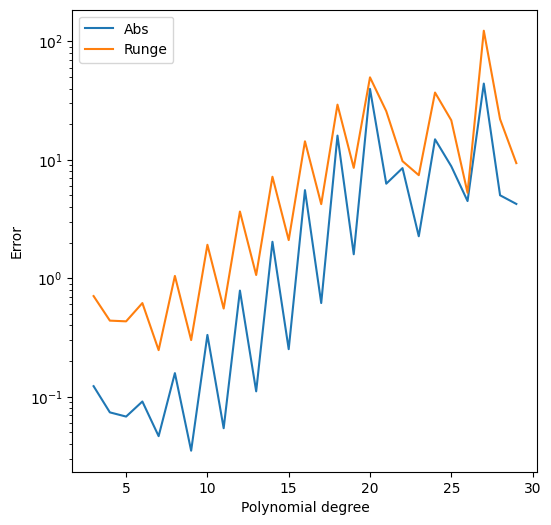

In [15]:
error1 = [] # Error of the absolute value function
error2 = [] # Error of Runge's function
N = range(3,30)
for n in N:
  X = linspace(0,1,n+1)
  error1.append(np.max(abs(interpolation(my_fun1,X,x)[0]-my_fun1(x))))
  # Updating the error list
  error2.append(np.max(abs(interpolation(my_fun2,X,x)[0]-my_fun2(x))))
plot(N,error1,label='Abs')
plot(N,error2,label='Runge')
yscale('log') # Log-scale, better for plotting the error
legend()
xlabel('Polynomial degree')
ylabel('Error')